In [42]:
import cv2


In [43]:
import matplotlib.pyplot as plt


In [44]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [45]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [46]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [47]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [48]:
print(len(classLabels))

80


In [49]:
img = cv2.imread('dog_PNG50412.png')

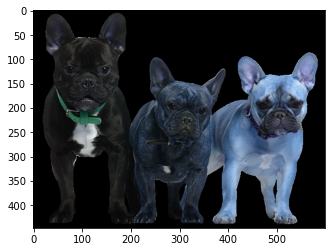

In [50]:
plt.imshow(img)

In [51]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001BDCD1670F0>

In [52]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [53]:
print(ClassIndex)

[[18]
 [18]
 [23]
 [18]]


In [54]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255, 0, 0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness=3 )

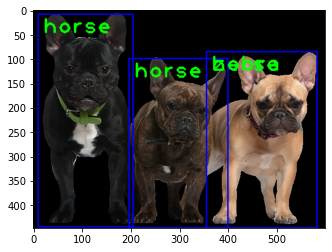

In [55]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [67]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isopened():
    raise IOError("Cannot open webcame")
    
    font_scale = 3
    font = cv2.FONT_HERSHEY_PLAIN
    
    while True:
        red,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(img,boxes,(255, 0, 0), 2)
                cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color= (0, 255, 0)
     
    #cv2.imshow('Object Detection Tutorial',img)
    
    if cv2.waitKey(2) & 0xFF == ord('q')
    
#cap.release()
#cv2.destroyAllWindows()
            
                    

SyntaxError: unexpected EOF while parsing (<ipython-input-67-df68eb48ace9>, line 28)